# Sprint 03. Tasca 02
## By José Manuel Castaño

## - Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips". 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
tips = pd.read_csv('tips.csv')

In [6]:
tips.shape

(244, 7)

In [16]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [3]:
#Per evitar problemes amb el nom size el renomenem a customers
tips.rename(columns={'size':'customers'}, inplace=True)                        

In [15]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
tips.day.nunique()

4

In [23]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [24]:
tips.describe().round(3)

,total_bill,tip,customers
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


In [12]:
round((tips[['tip','total_bill']]).median(), 3)
#Observem que la mitja i la mediana de tips són molt similars. Igualment amb la mitja i nediana de total_bill són pròximes

tip            2.900
total_bill    17.795
dtype: float64

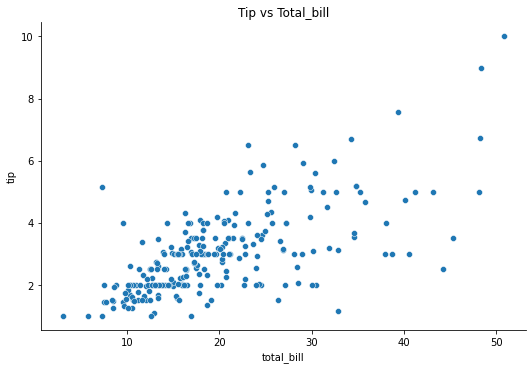

In [34]:
sns.relplot(x='total_bill', y='tip', data=tips, height=5, aspect=1.5).set(title='Tip vs Total_bill');
#S'observa que les tips guarden certa proporcionalitat amb el total_bill

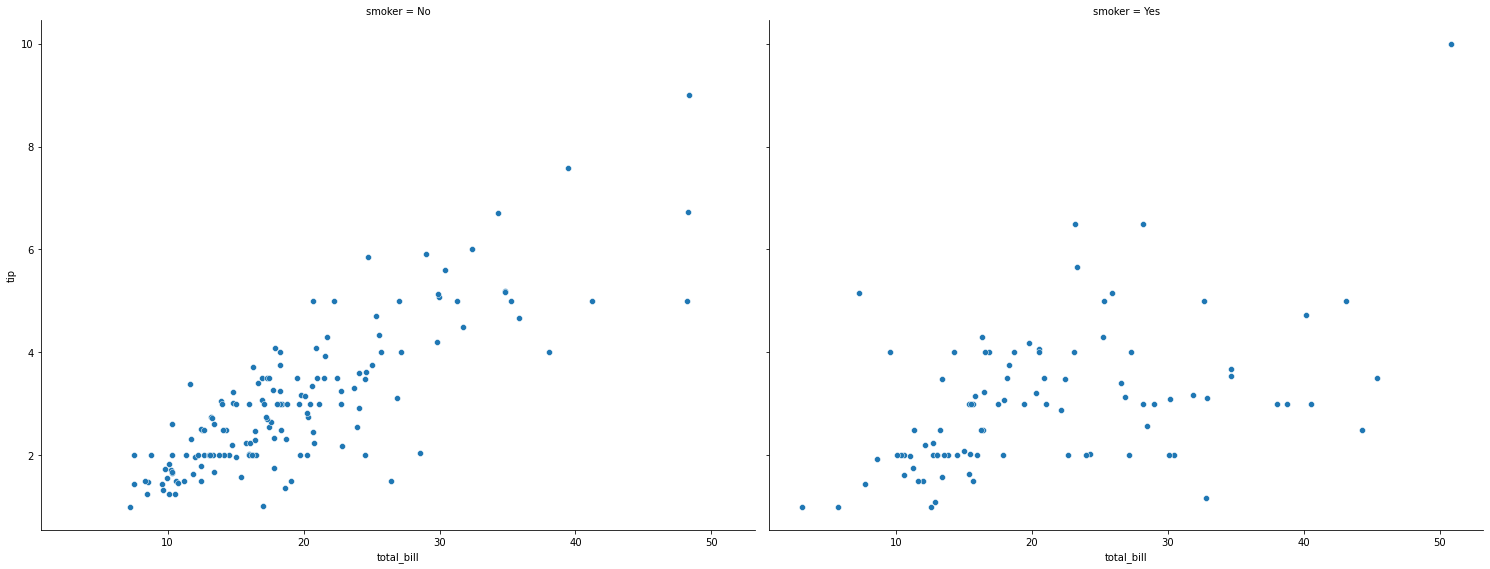

In [37]:
#Separem per fumador
sns.relplot(x='total_bill', y='tip', data=tips, col='smoker', height=8, aspect=1.3);
#Observem més proporcionalitat en els no fumadors

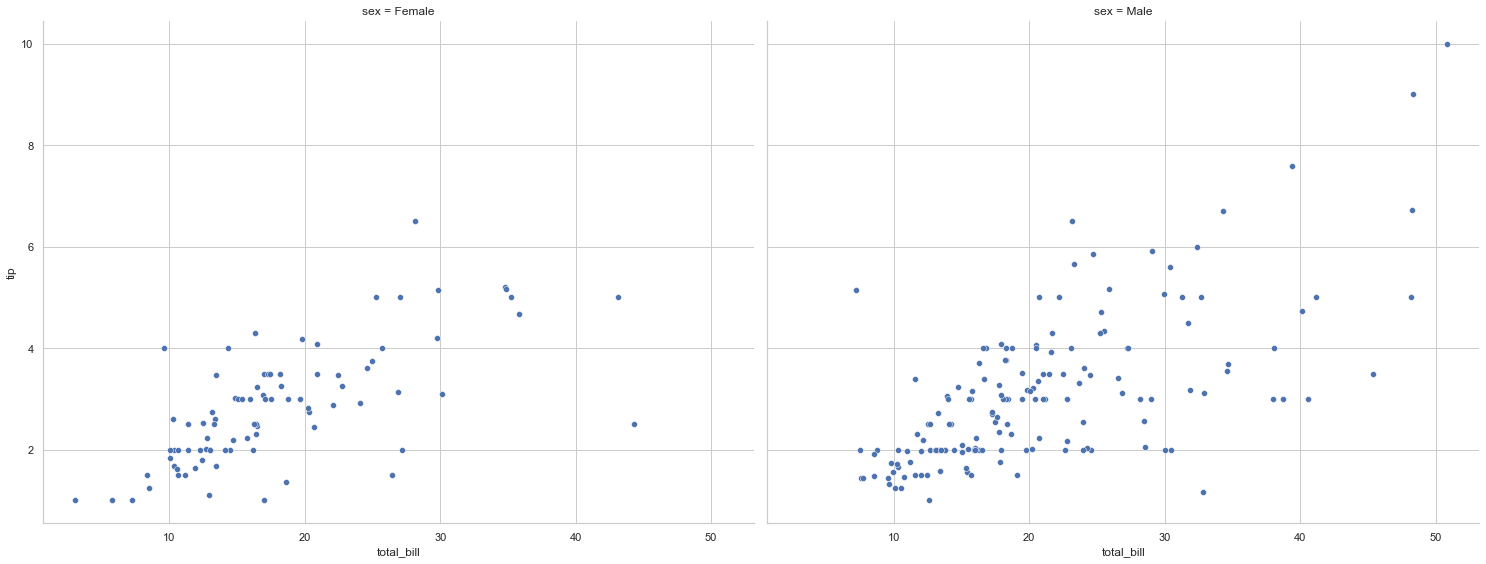

In [19]:
#Separem per sexe
sns.relplot(x='total_bill', y='tip', data=tips, col='sex', height=8, aspect=1.3);
#Observem que en les dones el total_bill és més baix i segueix més proporcionalitat

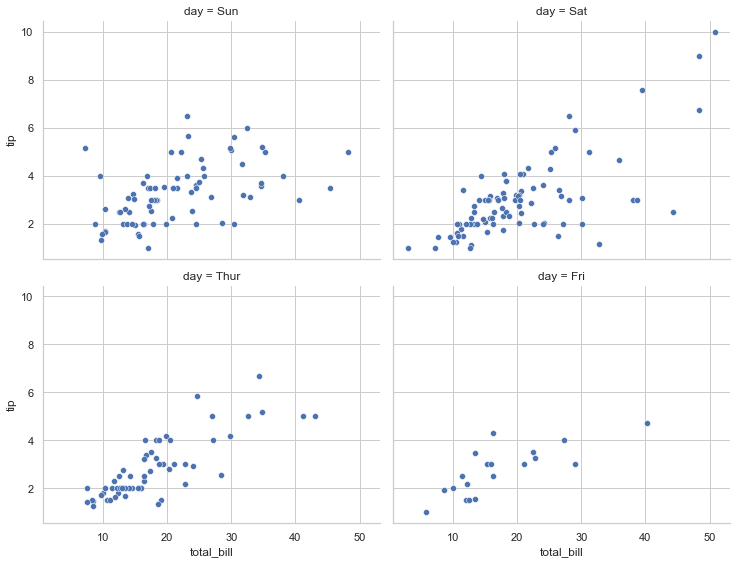

In [20]:
#Separem per dia
sns.relplot(x='total_bill', y='tip', data=tips, col='day', col_wrap=2, height=4, aspect=1.3);
#Observem que el diumenge els tips guarden poca proporcionalitat amb el total_bill

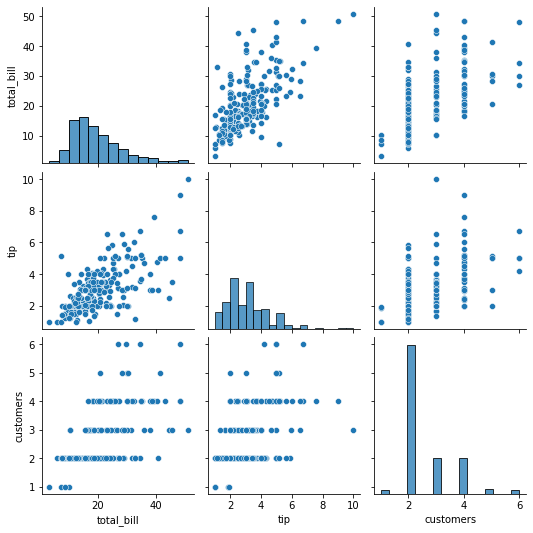

In [5]:
#Fem un matrix plot
sns.pairplot(data=tips);

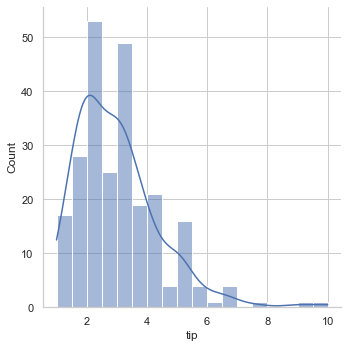

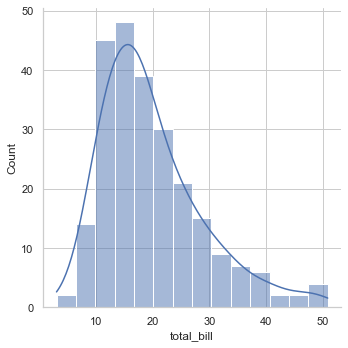

In [25]:
#Volem veure la distribució de les variables numériques total_bill i tips
sns.displot(x='tip', kde=True, data=tips);
sns.displot(x='total_bill', kde=True, data=tips);
#Observem que en els dos casos es tracta d'una distribució unimodal amb sesgo cap a la dreta. El tip presenta una cua més llarga


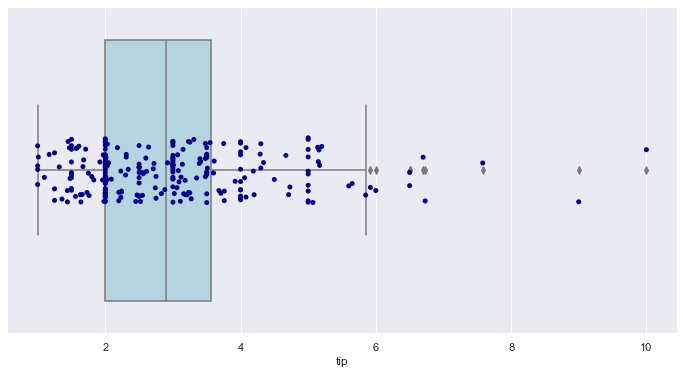

In [33]:
#Fem un boxplot de tip
sns. set (rc = {"figure.figsize" :( 12, 6 )})
ax=sns.boxplot(x=tips["tip"], orient='v', color='lightblue')
ax=sns.stripplot(x=tips["tip"], orient='v', color='darkblue')
#Veiem que la mediana és aprox 2.5$, que el percentil 25 és 2$ i el percentil 75 és aprox 3.5$. El IQR per tant está entre 2 i 3.5&
#Tenim uns quants outliers que com a màxim arriben a 10$

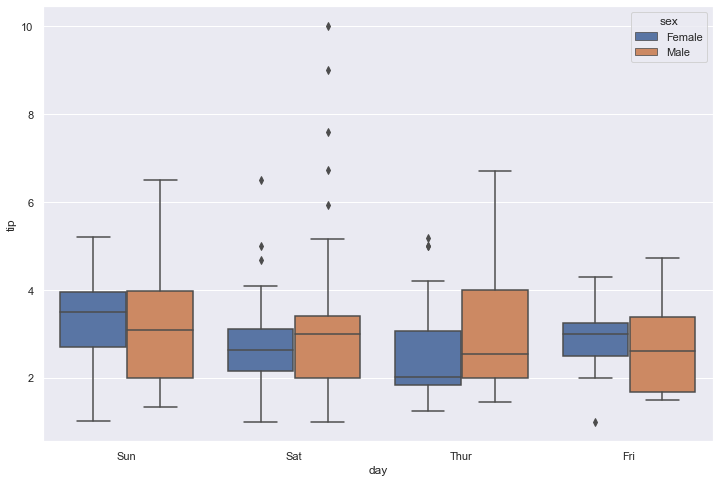

In [52]:
#Tips separades per day y sex
sns. set (rc = {"figure.figsize" :( 12, 8 )})
sns.boxplot(x='day', y='tip', hue='sex', data=tips);
#Veiem que en tots els casos les dones tenen una major IQR, que els disabtes és quan tenim més outliers (més i més elevats en els homes)

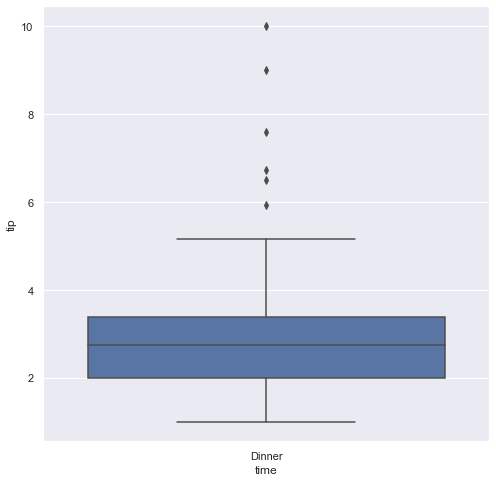

In [19]:
#Estudiem els autliers del dissabte
sns. set (rc = {"figure.figsize" :( 8, 8 )})
sns.boxplot(y='tip', x='time', orient='v', data=tips[tips['day']=='Sat']);
#Veiem que corresponen a la nit

In [15]:
#Afegim un nou camp calculat: el percentatge del tip sobre el total consumit. Hem vist que hi ha una certa proporcionalitat entre el total_bill i les tip 
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip'])) *100 ,2)
tips.head(10)

,total_bill,tip,sex,smoker,day,time,customers,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21
5,25.29,4.71,Male,No,Sun,Dinner,4,22.89
6,8.77,2.00,Male,No,Sun,Dinner,2,29.54
7,26.88,3.12,Male,No,Sun,Dinner,4,13.13
8,15.04,1.96,Male,No,Sun,Dinner,2,14.98
9,14.78,3.23,Male,No,Sun,Dinner,2,27.97


In [7]:
round((tips['tip_pct']).describe(), 3)
#Veiem que la mitja és molt baixa respecte al valor màxim. 

count    244.000
mean      20.212
std       16.339
min        3.700
25%       14.830
50%       18.310
75%       23.682
max      245.240
Name: tip_pct, dtype: float64

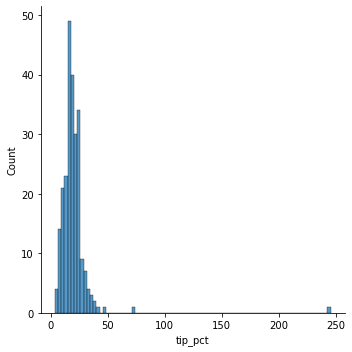

In [8]:
#Veiem la distribució de tip_pct
sns.displot(x='tip_pct', data=tips);
#Veiem que tenim alguns punts que están molt separats

In [29]:
#Mirem els valors de tip_pct
tips.sort_values(by =['tip_pct'])
#Sembla que tenim un outlier que te poc sentit (la tip és casi un 250% el cost del mejar)

,total_bill,tip,sex,smoker,day,time,customers,tip_pct
237,32.83,1.17,Male,Yes,Sat,Dinner,2,3.70
102,44.30,2.50,Female,Yes,Sat,Dinner,3,5.98
57,26.41,1.50,Female,No,Sat,Dinner,2,6.02
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
187,30.46,2.00,Male,Yes,Sun,Dinner,5,7.03
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,38.99
232,11.61,3.39,Male,No,Sat,Dinner,2,41.24
67,3.07,1.00,Female,Yes,Sat,Dinner,1,48.31
178,9.60,4.00,Female,Yes,Sun,Dinner,2,71.43


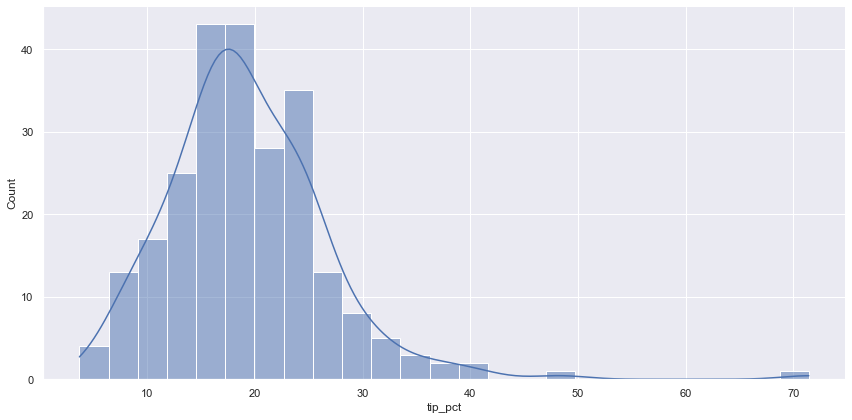

In [62]:
#Visualitzem la distribució de tip_pct sense tenir en compte el outlier
sns.displot(x='tip_pct', data=tips[tips['tip_pct']<200], kde=True, height=6, aspect=2);
#La distribució de tip_pct és unimodal i guarda una certa simetria amb sesgo a la dreta

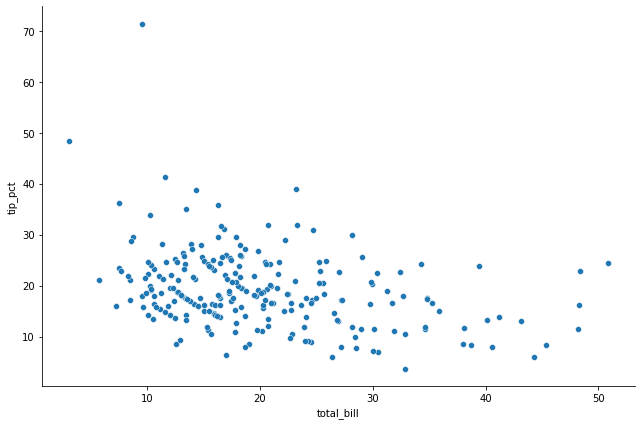

In [24]:
#Mirem tip_pct vs total_bill sense tenir en compte el outlier
sns.relplot(x='total_bill', y='tip_pct', data=tips[tips['tip_pct']<200], height=6, aspect=1.5);
#S'aprecia estabilitat del tip_pct respecte al total_bill

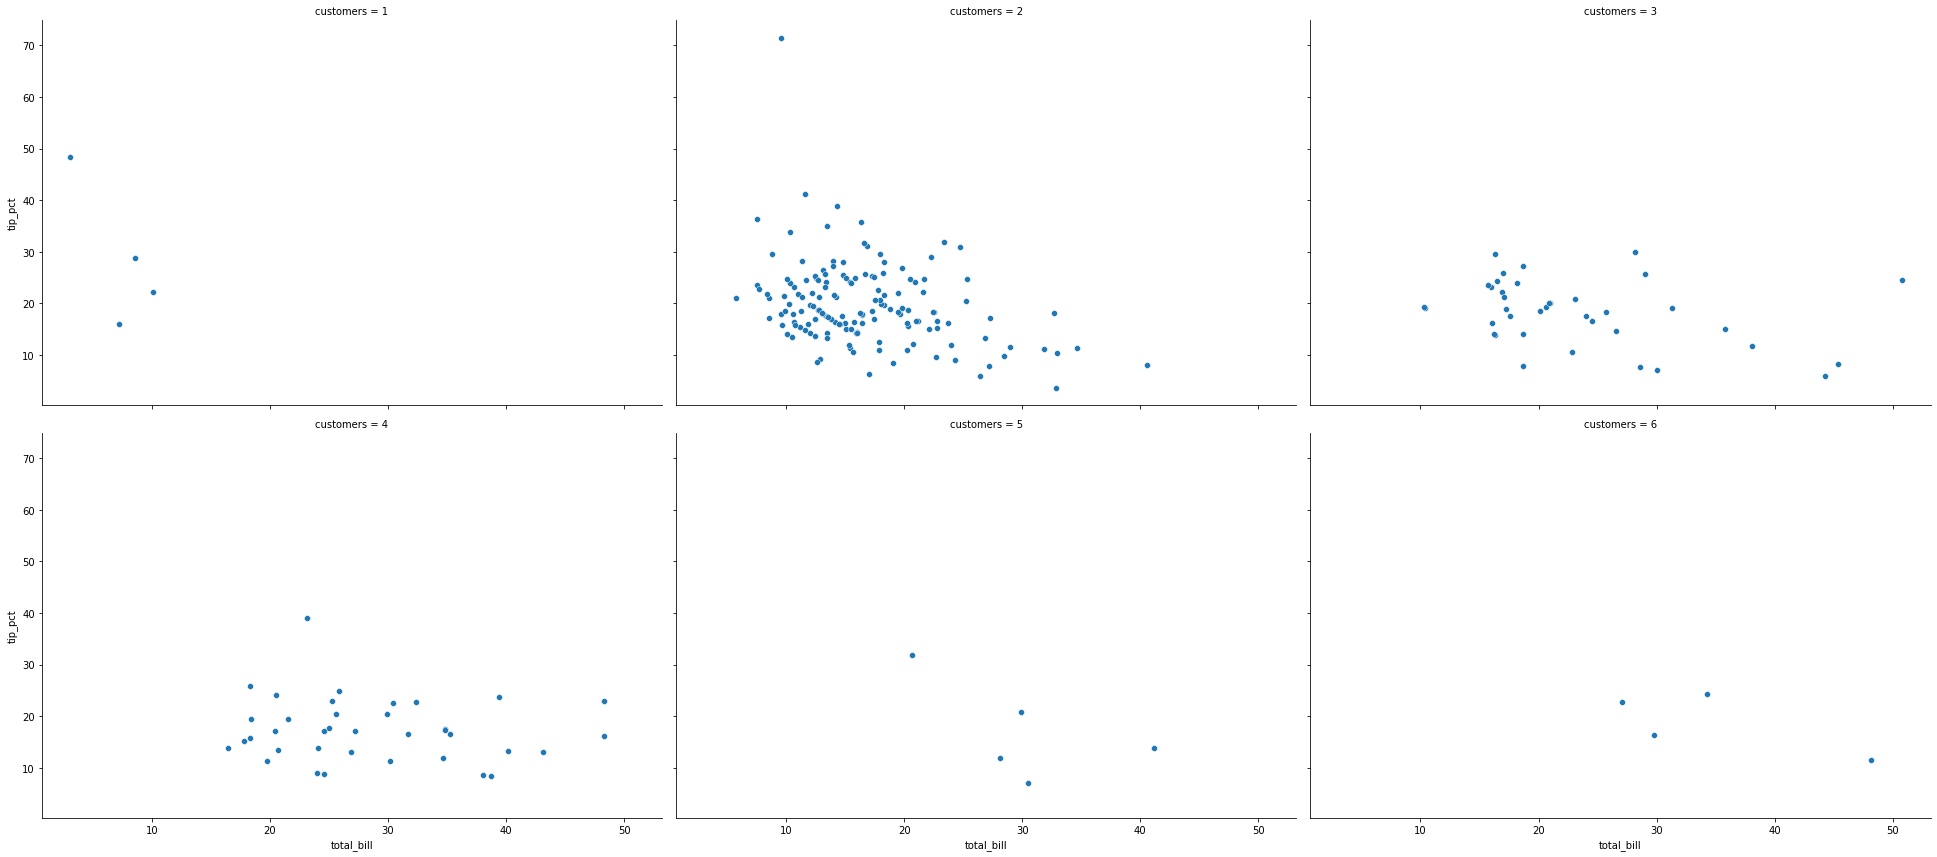

In [33]:
sns.relplot(x='total_bill', y='tip_pct', col='customers', col_wrap=3, data=tips[tips['tip_pct']<200], height=6, aspect=1.5);
#No s'aprecien grans diferències entre tip_pct i total_bill en funció del número de comensals (customers)

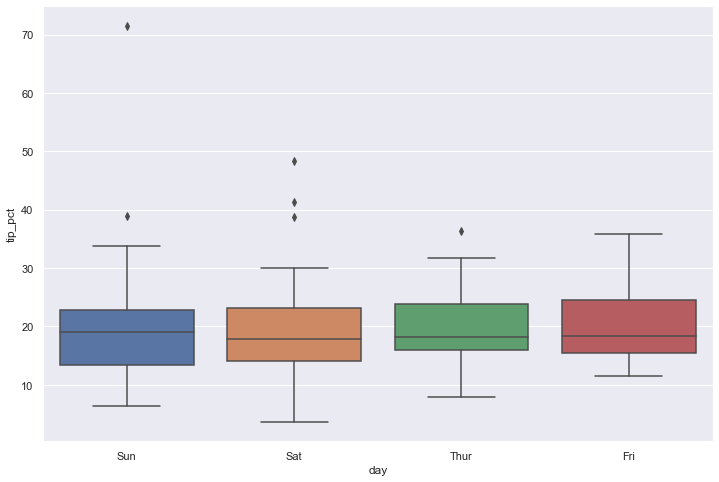

In [13]:
#Mirem tip_pct segons day
sns. set (rc = {"figure.figsize" :( 12, 8 )})
sns.boxplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 200]);
#Veiem mediana i IQR bastant similars

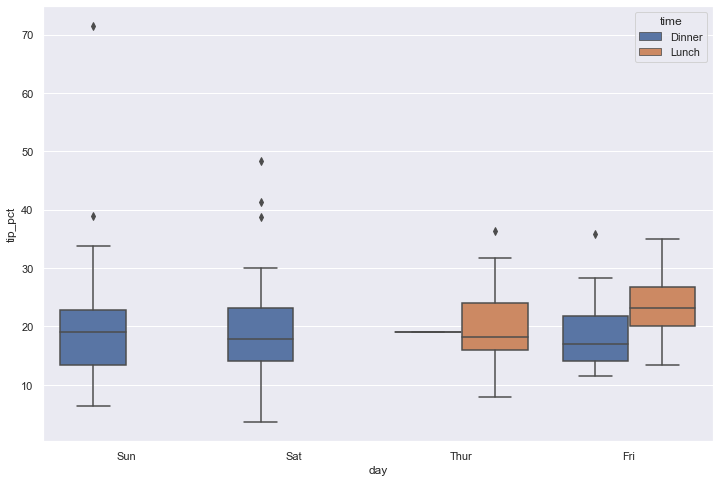

In [11]:
#Mirem tip_pct segons time
sns. set (rc = {"figure.figsize" :( 12, 8 )})
sns.boxplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 200]);
#Veiem que els divendres el tip_pct és sensiblement més alt al Lunch que al Dinner

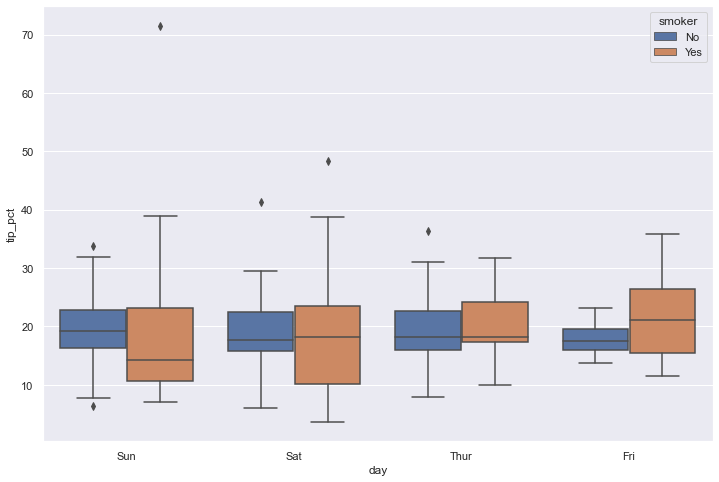

In [14]:
#Mirem tip_pct segons day y smoker
sns. set (rc = {"figure.figsize" :( 12, 8 )})
sns.boxplot(x='day', y='tip_pct', hue='smoker', data=tips[tips.tip_pct < 200]);
#Veiem que els divendres el tip_pct és sensiblement més alt al Lunch que al Dinner
#Veiem que els smokers tenen major IQR. En sunday els smokers tenen el tip_pct més baix i en friday més alt

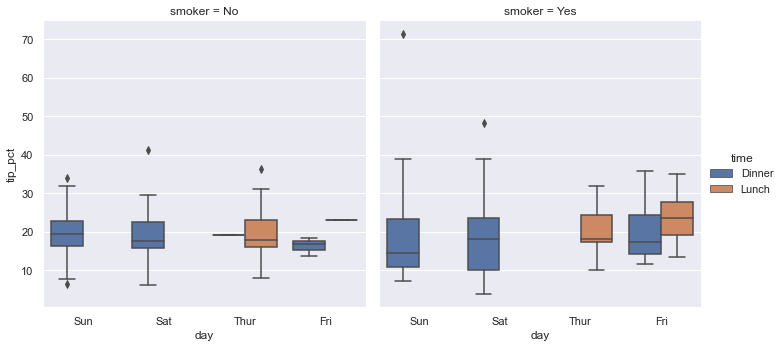

In [40]:
#Mirem tip_pct segons day, time i smoker
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='box', data=tips[tips.tip_pct < 245]);
#Els smokers tenen un IQR els saturday i sundays sensiblement més elevat